# Задача 1
Представленный набор данных содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д. Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке.

ВАЖНО: Задания с подробными пояснениями представлены в блокноте. Выполняя задания в блокноте, следует вводить полученные ответы в соответствующие поля ввода ниже. Рекомендуем вводить ответы поэтапно, для этого специально предусмотрено достаточное количество попыток.

**1. Подготовка и первичный анализ данных**

In [416]:
import pandas as pd
data = pd.read_csv("data/titanic_train.csv")
data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,"England New York, NY"


*Установите количество пропущенных значений колонки `age`.*

In [417]:
print(data['age'].isna().sum())

199


Постройте гистограмму распределения объектов по классам.

*Вычислите долю выживших.*

In [418]:
print(round(data['survived'].mean(), 3))

0.382


Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку `ticket`, вряд ли эта информация будет полезной.

Из описания набора данных видно, что колонки `sibsp` и `parch` по сути отвечают за размер семьи. Замените эти две колонки на колонку `fam_size`, значения которой будут вычисляться как сумма соответствующих значений в колонках `sibsp` и `parch`.

In [419]:
data['fam_size'] = data['sibsp'] + data['parch']
data.drop(['sibsp', 'parch', 'ticket'], axis=1, inplace=True)
for column in data.columns:
    if data[column].isna().sum()/len(data) > 1/3:
        data.drop(column, axis=1, inplace=True)
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


*Вычислите выборочное среднее колонки `fam_size`.*

In [420]:
print(round(data['fam_size'].mean(), 3))

0.866


Полученный датасет будем называть ИСХОДНЫМ (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания).

*Вычислите число предикторов полученного набора данных.*

In [421]:
print(len(data.columns)-1)

7


*На основе имеющейся статистики оцените вероятность выжить, если пассажир — представитель следующей категории: `female and pclass:1`.*

In [422]:
print(round(data[(data['sex'] == 'female') & (data['pclass'] == 1) & (data['survived'] == 1)].shape[0] / data[(data['sex'] == 'female') & (data['pclass'] == 1)].shape[0], 3))

0.971


Постройте гистограммы выжиших и невыживших по возрастам.
*Введите номер изображения, соответствующего гистограмме распределения выживших по возрастам.*


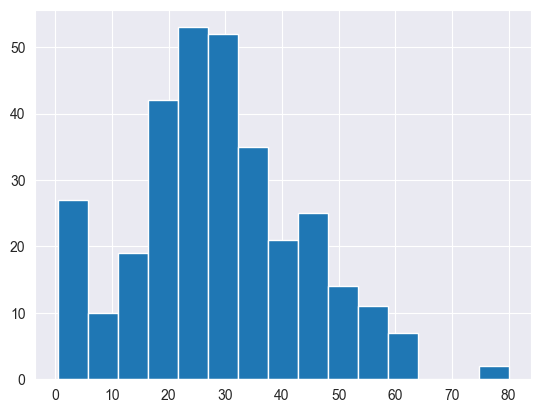

In [423]:
import matplotlib.pyplot as plt
plt.hist(data[data['survived'] == 1]['age'], bins = 15)
plt.show()

**2. Модель на основе числовых признаков**

**Удаление строк с пропусками**

Из исходного датасета отберите только числовые признаки. Удалите строки, содержащие пропуски. При помощи `train_test_split()` разбейте набор данных на обучающую и тестовую выборки с параметрами `test_size=0.2`, `random_state=35`. Используйте стратификацию по колонке `survived`.

Обучите модель `LogisticRegression()` со следующими параметрами: `random_state=35`, `max_iter=1000` на тренировочных данных, оцените на тестовых.

Вычислите `f1_score` модели на тестовых данных (рекомендуем использовать соответствующую функцию с параметрами по умолчанию).

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

new_data = data.dropna()
new_data = new_data.drop(new_data.select_dtypes(exclude=['number']).columns, axis=1)

def trainAndPredict(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop("survived", axis=1), data["survived"], test_size=0.2, random_state=35, stratify=data['survived'])
    model = LogisticRegression(random_state=35, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(round(f1_score(y_test, y_pred), 3))
    
trainAndPredict(new_data)

0.518


**Заполнение пропусков средним**

Из исходного набора данных отберите только числовые признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

*Вычислите `f1_score()` модели для тестового набора данных.*

In [425]:
new_data = data.apply(lambda col: col.fillna(col.mode()[0]))
new_data = new_data.drop(new_data.select_dtypes(exclude=['number']).columns, axis=1)
trainAndPredict(new_data)

0.483


**Заполнение пропусков на основе обращения**

Из исходного набора данных отберите числовые признаки, а также колонку `name`. Создайте отдельную колонку `honorific` и поместите туда значения обращений (`Mr.`, `Mrs.`, `Dr.` и т.д.), извлеченных из колонки `name`.

*Вычислите число уникальных обращений.*

In [426]:
new_data = data.copy()
def findHonorific(name):
    start_index = name.find(',') + 2
    end_index = name.find('.')
    if start_index > 0 and end_index > 0:
        return name[start_index:end_index]
    return ""

new_data['honorific'] = new_data['name'].apply(findHonorific)
print(len(set(new_data['honorific'])))

14


Выполните следующие замены:

`Mr` <- `[Rev, Col, Dr, Major, Don, Capt]`

`Mrs` <- `[Dona, the Countess]`
Замечание: в зависимости от способа извлечения обращения из имени обращение `Countess` может быть извлечено как `the Countess`. Рекомендуем перепроверить ваши результаты.

`Miss` <- `[Mlle, Ms]`

*Вычислите долю строк со значением `Master` относительно числа всех мужчин.*

In [427]:
def replaceHonorific(name):
    for old_name in ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']:
        if name == old_name:
            return "Mr"
    for old_name in ['Dona', 'the Countess']:
        if name == old_name:
            return "Mrs"
    for old_name in ['Mlle', 'Ms']:
        if name == old_name:
            return "Miss"
    return name
        
    
new_data['honorific'] = new_data['honorific'].apply(replaceHonorific)
print(round(new_data[new_data['honorific'] == 'Master'].shape[0] / new_data[new_data['sex'] == 'male'].shape[0], 3))

0.072


*Вычислите средний возраст категории `Master`.*

In [428]:
print(round(new_data[new_data['honorific'] == 'Master']['age'].mean(), 3))

5.128


Заполните пропуски в колонке age средним, соответствующим среднему категории honorific. Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

*Вычислите f1_score модели на тестовых данных.*

In [429]:
mean_age = new_data.groupby('honorific')['age'].mean()
def fillMissingAge(row, new_age=mean_age):
    if pd.isna(row['age']):
        return new_age.get(row['honorific'], row['age'])
    return row['age']
new_data['age'] = new_data.apply(fillMissingAge, axis=1)
not_number_keys = new_data.select_dtypes(exclude=['number']).columns
new_data.drop(not_number_keys, axis=1, inplace=True)
trainAndPredict(new_data)

0.466


**3. Модель с использованим категориальных признаков**

В исходном наборе данных заполните пропуски колонки age значениями на основе обращений (как в предыдущем пункте). После этого выбросите признаки `name` и `honorific`. Они свою функцию выполнили.

Произведите `one-hot` кодировние нечисловых признаков, например, с помощью `pd.get_dummies(drop_first=True)`. Далее по знакомой схеме: разделение, обучение, оценка.

*Вычислите f1_score модели на тестовых данных.*

In [430]:
dumnies = pd.get_dummies(data[not_number_keys.drop(['name', 'honorific'])], drop_first=True)
new_data = pd.concat([new_data, dumnies], join='inner', axis=1)
trainAndPredict(new_data)

0.71


# Задача 2

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. В качестве метрики используется f1_score. В зависмости от f1_score ваши баллы за выполнение задания вычисляются согласно следующему соотношению

In [431]:
def transformData(data):
    data['fam_size'] = data['sibsp'] + data['parch']
    data.drop(['sibsp', 'parch', 'ticket'], axis=1, inplace=True)
    for column in data.columns:
        if data[column].isna().sum()/len(data) > 1/3:
            data.drop(column, axis=1, inplace=True)
            
    data['honorific'] = data['name'].apply(findHonorific)
    data['honorific'] = data['honorific'].apply(replaceHonorific)
    data['age'] = data.apply(lambda row: fillMissingAge(row, new_age=data.groupby('honorific')['age'].mean()), axis=1)
    not_number_keys = data.select_dtypes(exclude=['number']).columns
    dumnies = pd.get_dummies(data[not_number_keys.drop(['name', 'honorific'])], drop_first=True)
    data.drop(not_number_keys, axis=1, inplace=True)
    return pd.concat([data, dumnies], join='inner', axis=1)

data = pd.read_csv("data/titanic_train.csv")
data = transformData(data)
X_train = data.drop('survived', axis=1)
y_train = data['survived']

X_test = pd.read_csv("data/titanic_reserved.csv")
X_test = transformData(X_test)

model = LogisticRegression(random_state=40, max_iter=1000, penalty=None, class_weight='balanced') # 0.709
model.fit(X_train, y_train)
# print(round(f1_score(y_train, model.predict(X_train)), 3))
y_pred = model.predict(X_test)
print([int(i) for i in y_pred])

[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
